In [2]:
from TestingEssentials import GenerateJ, EvaluateC, C_Max, C_MaxFromC, start_t
from DataVisualization import plot_schedule_fancy
from GeneticAlgorithm import GeneticAlgorithm
from TestingEssentials import getMakData as get_data_from_file
from nehpy import neh
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#### Parametry dla algorytmu genetycznego

In [3]:
#Generuje zbiór danych wejściowych
J, _  = GenerateJ(100,5,5)

J_list = [GenerateJ(10,5,i) for i in range(0,50)]
J_list, _ = zip(*J_list)

#Możliwe operatory genetyczne do dalszego przetwarzania
mutations = ["hard", "mid","soft"]
crossovers = ["simple", "section", "nearest"]
selections = ["roulette", "tournament"]

#Parametry algrytmu genetycznego
population_size = 50
mutation_rate = 0.1
generations = 200

#### Uruchomienie algorytmu genetycznego

In [4]:
results = []
for J in J_list:
    nehcmax = neh(J.copy())
    for mutation in mutations:
        for crossover in crossovers:
            for selection in selections:
                ga = GeneticAlgorithm(J, 
                            population_size, 
                            mutation_rate, 
                            generations,
                            mutation_type=mutation, 
                            crossover_type=crossover, 
                            selection_type=selection,
                            register_all = False)
                best_solutions = ga.Genetic()
                for i in range(len(best_solutions)):
                    best_solution = best_solutions[i]
                    best_solution_Cmax = C_Max(J,best_solution)
                    percentage = (nehcmax - best_solution_Cmax)
                    percentage = percentage/nehcmax
                    results.append({'combination': mutation+"_"+crossover+"_"+selection, 'generation': i,'Cmax': best_solution_Cmax, 'percentage': percentage})




best_solution_Cmax = C_Max(J,best_solution)
best_solution = [elem + 1 for elem in best_solution]


# Zapisz wyniki do dataframe
df = pd.DataFrame(results)


In [5]:
# Wyświetl wyniki
print(df)
df.to_csv('data_combinations_results.csv', index=False)
#plot_schedule_fancy(best_solution, J, start_t(J, best_solution,(EvaluateC(J,best_solution)))) 

                    combination  generation  Cmax  percentage
0          hard_simple_roulette           0   181   -0.040230
1          hard_simple_roulette           1   174    0.000000
2          hard_simple_roulette           2   172    0.011494
3          hard_simple_roulette           3   172    0.011494
4          hard_simple_roulette           4   172    0.011494
...                         ...         ...   ...         ...
179995  soft_nearest_tournament         195   181   -0.011173
179996  soft_nearest_tournament         196   181   -0.011173
179997  soft_nearest_tournament         197   181   -0.011173
179998  soft_nearest_tournament         198   181   -0.011173
179999  soft_nearest_tournament         199   181   -0.011173

[180000 rows x 4 columns]


#### Poszukiewanie kombinacji która średnio wypada najlepiej

In [64]:
final = df[df["generation"].isin([df["generation"].max()])]
# print(final)
mean_for_each_config_final = final.groupby(['combination'])['percentage'].mean()
mean_for_each_config = df.groupby(['combination','generation'],group_keys = False).mean()

# print(mean_for_each_pop_value)
print(mean_for_each_config)
# print(mean_for_each_gen_value)


# Znajdź indeksy dla maksymalnych wartości średnich w kolumnie 'percentage'
best_config_index = mean_for_each_config_final.idxmax()

print(best_config_index)

# Wyświetl kombinację parametrów dla najlepszej średniej 'percentage'
best_config_params = mean_for_each_config_final.loc[[best_config_index]]
print("kombinacja która wypadła średnio najlepiej:\n",best_config_params)

                                     Cmax  percentage
combination            generation                    
hard_nearest_roulette  0           165.84   -0.054933
                       1           163.68   -0.041323
                       2           163.14   -0.037861
                       3           163.04   -0.037191
                       4           163.04   -0.037191
...                                   ...         ...
soft_simple_tournament 195         159.12   -0.011816
                       196         159.12   -0.011816
                       197         159.12   -0.011816
                       198         159.12   -0.011816
                       199         159.12   -0.011816

[3600 rows x 2 columns]
aaa mid_section_tournament
kombinacja która wypadła średnio najlepiej:
 combination
mid_section_tournament   -0.004152
Name: percentage, dtype: float64


In [72]:
final_2 = df[df["percentage"].isin([df["percentage"].max()])]
print("kombinacje które uzyskały największe wyniki:")
print(final_2['combination'].unique())

mean_for_each_config_final = final_2['percentage'].max()
print("Wynik:",mean_for_each_config_final)


kombinacje które uzyskały największe wyniki:
['hard_section_tournament' 'soft_section_tournament']
Wynik: 0.050724637681159424


In [43]:
import warnings
# warnings.filterwarnings("ignore", "is_categorical_dtype")
warnings.filterwarnings("ignore", "use_inf_as_na")

warnings.filterwarnings(
    action="ignore",
    message=r"When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas\. Pass `\(name,\)` instead of `name` to silence this warning\.",
    category=FutureWarning,
)


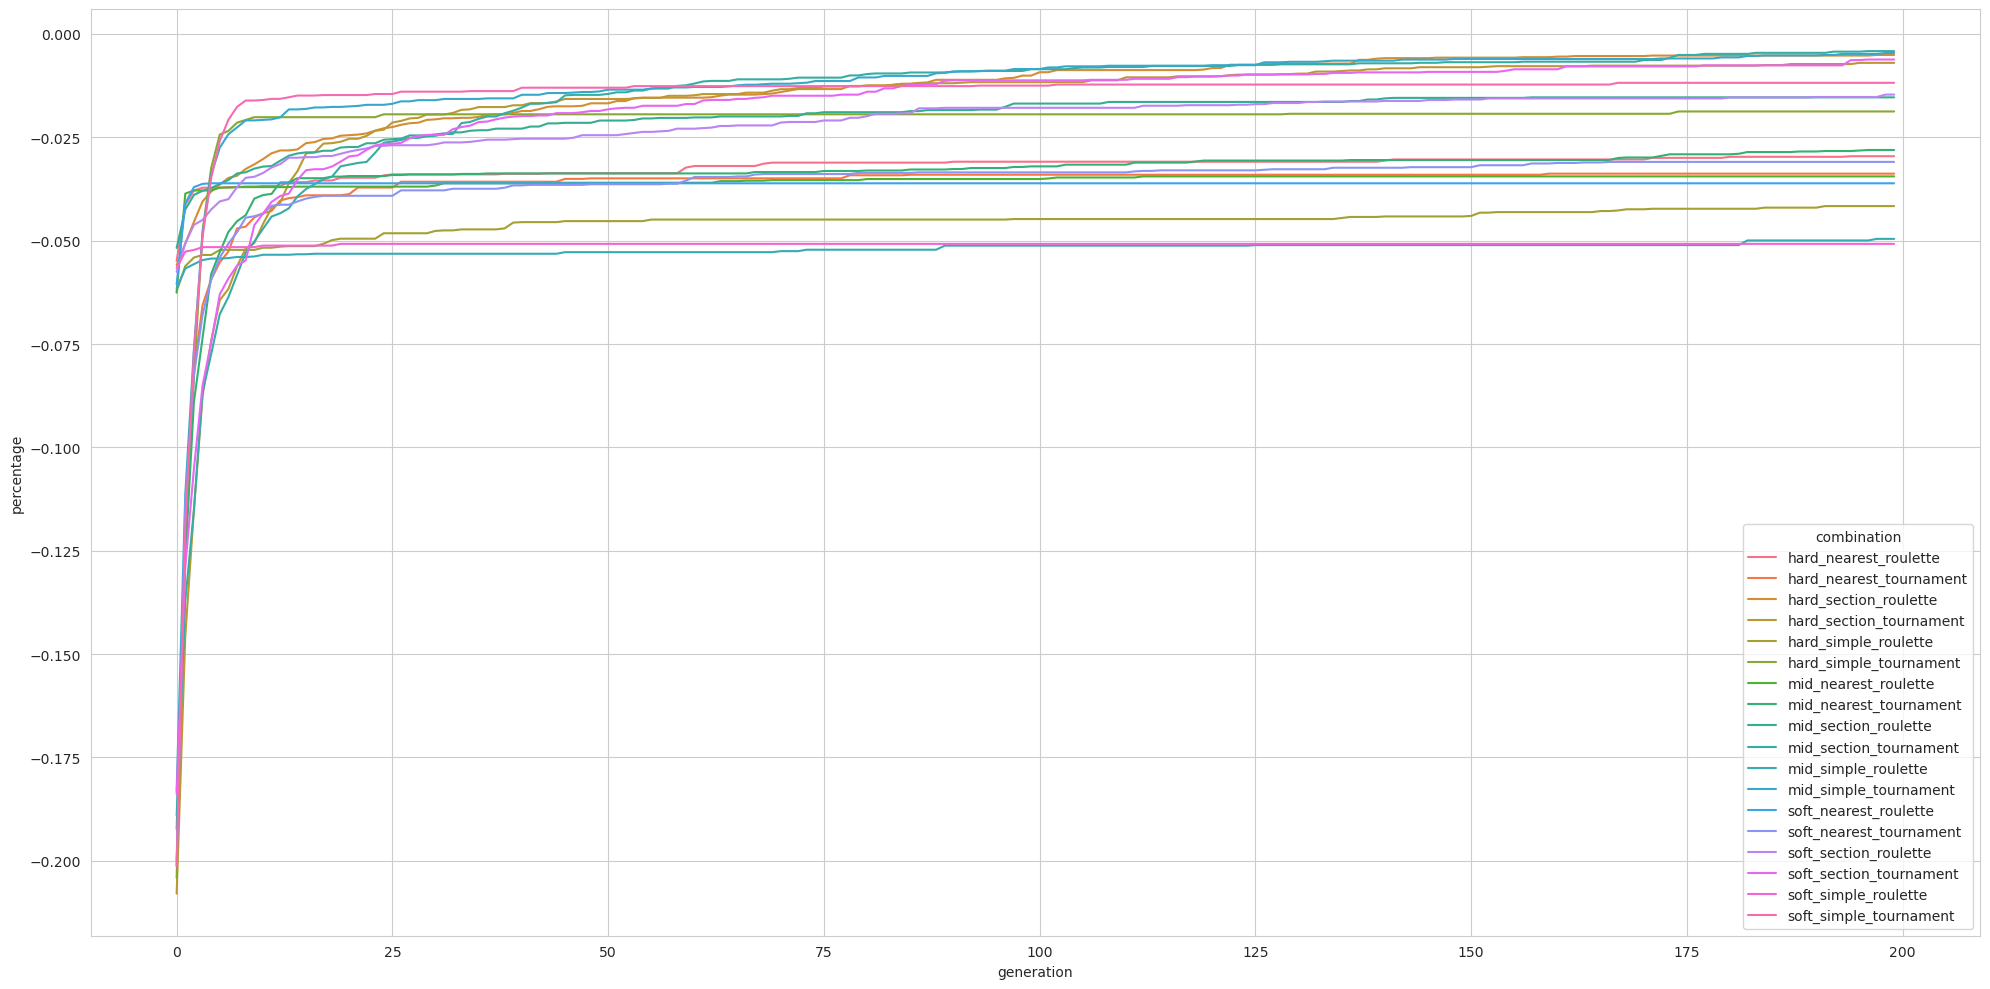

In [44]:
sns.set_style("whitegrid")
pd.set_option('mode.use_inf_as_na', False)
fig = plt.subplots(figsize=(20, 10))
sns.lineplot(x = "generation", y = "percentage", data=mean_for_each_config, hue='combination')

plt.tight_layout()
plt.show()


In [88]:
best_combo = final_2['combination'].unique()
best_combo = best_combo.tolist()
best_combo.append(best_config_index)
# best_combo
best_combination_data = df[df["combination"].isin(best_combo)]

best_combination_data = best_combination_data.groupby(['combination','generation'],group_keys = False).mean()

# mean_for_each_config[mean_for_each_config["combination"].isin(best_combo)]

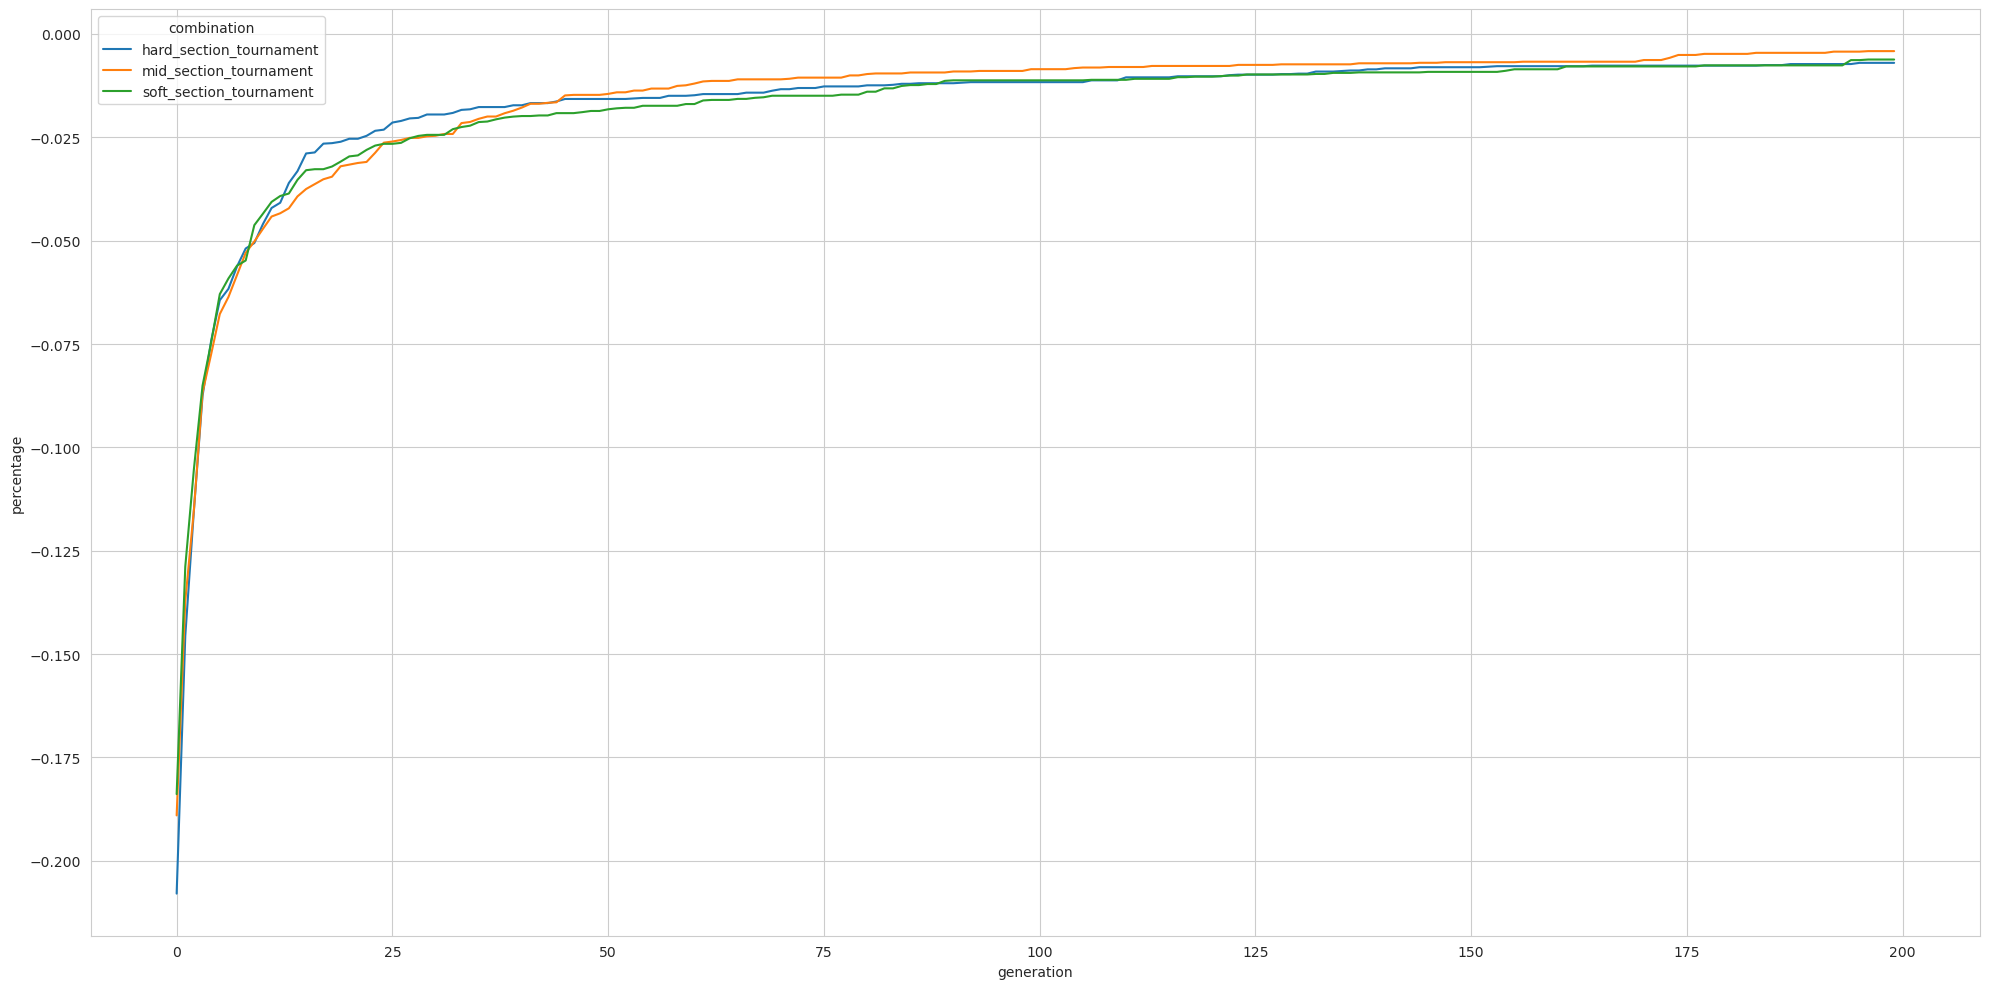

In [89]:
sns.set_style("whitegrid")
pd.set_option('mode.use_inf_as_na', False)
fig = plt.subplots(figsize=(20, 10))
sns.lineplot(x = "generation", y = "percentage", data=best_combination_data, hue='combination')

plt.tight_layout()
plt.show()
